Data Preprocessing

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

from pandas import Series, DataFrame 

#그래프
import matplotlib.pyplot as plt

#시각화할 때 한글을 출력하기 위해서
import platform
from matplotlib import font_manager, rc
#한글처리
#메켄도시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = "c://Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#음수를 표시하기 위한 설정
plt.rcParams['axes.unicode_minus'] = False

In [7]:
#데이터 읽어오기
mpg = pd.read_csv('c://programming/python/pandasdata/auto-mpg.csv', header=None)
print(mpg.head())

#컬럼이름 만들기
mpg.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
               'acceleration', 'model year', 'origin', 'name']
mpg.info()

      0  1      2      3       4     5   6  7                          8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1  15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2  18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3  16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4  17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-n

In [8]:
#mpg가 갤런당 마일이므로 리터당 킬로미터로 변환해서 열을 추가
#1.60934 / 3.78541
#소수 두번째자리에서 반올림
mpg['kpl'] = (mpg['mpg'] * 1.60934 / 3.78541).round(2)

print(mpg.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name   kpl  
0       1  chevrolet chevelle malibu  7.65  
1       1          buick skylark 320  6.38  
2       1         plymouth satellite  7.65  
3       1              amc rebel sst  6.80  
4       1                ford torino  7.23  


자료형 확인

In [11]:
mpg.info()
print(mpg.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object


In [14]:
#horsepower의 값들을 확인
print(mpg['horsepower'].unique())  #?의 값이 존재

#?를 NaN으로 변환
mpg['horsepower'].replace('?', np.nan, inplace=True)
mpg['horsepower'] = mpg['horsepower'].astype('float')
mpg.info()

[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193.  nan 100. 105. 175. 153. 180.
 110.  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92.
 145. 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.
  52.  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152.
 102. 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138.
 135. 142.  77.  62. 132.  84.  64.  74. 116.  82.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-nul

In [16]:
#정수 데이터를 매핑이 되는 문자열로 변환
mpg['origin'].replace({1:'USA', 2:'EU', 3:'JPN'}, inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,7.23


In [18]:
#범주형으로 변환
mpg['origin'] = mpg['origin'].astype('category')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   name          398 non-null    object  
 9   kpl           398 non-null    float64 
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 28.6+ KB


표준값 구하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      9 non-null      object
 1   국어      9 non-null      int64 
 2   영어      9 non-null      int64 
 3   수학      9 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes
    이름  국어  영어  수학
0  박지영  90  85  55
1  김태함  70  65  80
2  김효섭  92  95  76
3  임경희  76  89  88
4  권혁진  97  87  83


<AxesSubplot:>

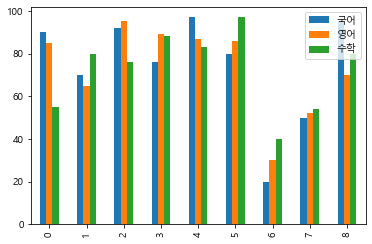

In [21]:
student = pd.read_csv('c://programming/python/pandasdata/student.csv', encoding='ms949')
student.info()

print(student.head())

#인덱스 설정
student_index = student['이름']

student.plot(kind='bar')

74.44444444444444 25.239409220062534
73.22222222222223 21.247222040644385
72.55555555555556 18.642096925447465


<AxesSubplot:>

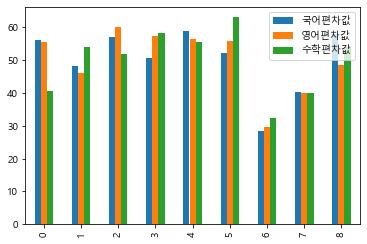

In [24]:
#표준값 구하기 - 평균 , 표준편차 필요
kormean, korstd = student['국어'].mean(), student['국어'].std()
print(kormean, korstd)
engmean, engstd = student['영어'].mean(), student['영어'].std()
print(engmean, engstd)
matmean, matstd = student['수학'].mean(), student['수학'].std()
print(matmean, matstd)

student['국어표준값'] = (student['국어'] - kormean)/korstd
student['영어표준값'] = (student['영어'] - engmean)/engstd
student['수학표준값'] = (student['수학'] - matmean)/matstd

#편차값 구하기
student['국어편차값'] = student['국어표준값'] * 10 + 50
student['영어편차값'] = student['영어표준값'] * 10 + 50
student['수학편차값'] = student['수학표준값'] * 10 + 50

student[['국어편차값', '영어편차값', '수학편차값']].plot(kind='bar')

표준화

In [ ]:
# 데이터 읽어오기
df = pd.read_csv('data/auto-mpg.csv', header=None)
# 열 이름을 설정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
'acceleration','model year','origin','name']
# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True) # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환
# horsepower 열의 통계 요약정보로 최대값(max)을 확인
print(df.horsepower.describe())
print()
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.maxhorsepower = df.horsepower / abs(df.horsepower.max())
print(df.maxhorsepower.head())
print()
print(df.maxhorsepower.describe())

In [ ]:
# horsepower 열에서 최소값을 빼기
min_x = df.horsepower - df.horsepower.min()
# horsepower 열의 최대값에서 최소값 빼기
min_max = df.horsepower.max() - df.horsepower.min()
# 최소값을 뺀 값을 최대-최소로 나누기
df.minmaxhorsepower = min_x / min_max
#0.0 ~ 1.0 사이의 값으로 만들기
print(df.minmaxhorsepower.head())
print()
print(df.minmaxhorsepower.describe())

In [ ]:
scikit-learn 표준화 클래스
from sklearn import preprocessing
import numpy as np
x = df[['horsepower']].values
print('평균:', np.mean(x))
print('표준편차:', np.std(x))
print('최대값:', np.max(x))
print('최소값:', np.min(x))
print()
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
print('평균:', np.mean(x_scaled))
print('표준편차:', np.std(x_scaled))
print('최대값:', np.max(x_scaled))
print('최소값:', np.min(x_scaled))
print()

scaler = preprocessing.MaxAbsScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
print('평균:', np.mean(x_scaled))
print('표준편차:', np.std(x_scaled))
print('최대값:', np.max(x_scaled))
print('최소값:', np.min(x_scaled))


from sklearn.preprocessing import MaxAbsScaler
X = [[ 1., -1., 2.],
[ 2., 0., 0.],
[ 0., 1., -1.]]
transformer = MaxAbsScaler().fit(X)
transformer.transform(X)